In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2 as cv2
import time as t
import imutils
import math

# https://stackoverflow.com/questions/7263621/how-to-find-corners-on-a-image-using-opencv

In [ ]:
mpl.rc('axes', titlesize=14)  
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Routine to fix the image
def fix_image(image):  
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def distance(pt1, pt2):
    (x1, y1), (x2, y2) = pt1, pt2
    dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    return dist

def clean_up_points(thresh : int, coordiantes):
    coor_tuples_copy = coordiantes
    i = 1
    for pt1 in coordiantes:
    # print(' I :', i)
        for pt2 in coordiantes[i::1]:
            # print(pt1, pt2)
            # print('Distance :', distance(pt1, pt2))
            if(distance(pt1, pt2) < thresh):
                coor_tuples_copy.remove(pt2)      
        i+=1
    return coor_tuples_copy

def clean_up_points_inverse(thresh : int, coordiantes):
    coor_tuples_copy = coordiantes.reverse()
    i = 1
    for pt1 in coordiantes:
    # print(' I :', i)
        for pt2 in coordiantes[i::1]:
            # print(pt1, pt2)
            # print('Distance :', distance(pt1, pt2))
            if(distance(pt1, pt2) > thresh):
                coor_tuples_copy.remove(pt2)      
        i+=1
    return coor_tuples_copy


def find_rectangle(thresh : int, coordinates):
    coordinates.reverse()
    rectangle_coords = [coordinates[0]]
    # print(len(rectangle_coords))
    i = 1
    for pt1 in coordinates:
    # print(' I :', i)
        for pt2 in coordinates[i::1]:
            # print(pt1, pt2)
            # print('Distance :', distance(pt1, pt2))
            if(distance(pt1, pt2) > thresh):
                rectangle_coords.append(pt2)
                if (len(rectangle_coords) == 4):
                    return rectangle_coords
        i+=1
    return rectangle_coords

def close_up_point_remove(thresh : int, coordinates):
    coordinates.reverse()
    rectangle_coords = []
    for i in range(len(coordinates) - 1):
        dist = distance(coordinates[i], coordinates[i + 1])
        if dist > thresh:
            rectangle_coords.append(coordinates[i])
            if (len(rectangle_coords) == 4):
                return rectangle_coords
    
    return rectangle_coords

# Get points withing image

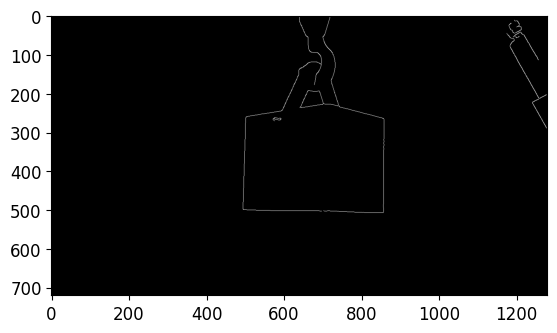

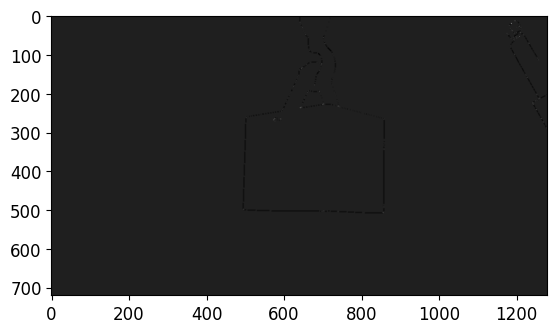

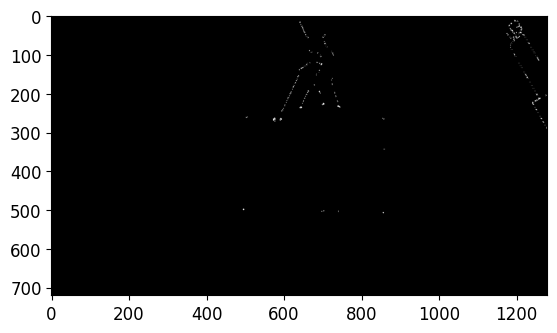

In [16]:
path = r''
filename = '1.jpg'

img = cv2.imread(path + filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    #--- convert to grayscale


# blurred = cv2.GaussianBlur(gray, (5, 1), 0)
blurred = cv2.bilateralFilter(gray, 5, 75, 75)

canny = cv2.Canny(blurred, 100, 300)

plt.imshow(fix_image(canny))
plt.show()

dst = cv2.cornerHarris(canny, 2, 3, 0.04)
plt.imshow(dst, cmap='gray')
plt.show()

mask = np.zeros_like(gray)

mask[dst > 0.01 * dst.max()] = 255
plt.imshow(fix_image(mask))
plt.show()

In [ ]:
# Read image
image = cv2.imread("1.jpg")

# image = image[0:720, 200:1000]

# COnvert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# smooth the image
# gray = cv2.GaussianBlur(gray, (5, 1), 0)
bi = cv2.bilateralFilter(gray, 5, 75, 75)
# smooth = cv2.GaussianBlur(gray, (5, 7), 0)

canny = cv2.Canny(bi, 100, 300)
# plt.imshow(fix_image(canny))
# plt.show()


dst = cv2.cornerHarris(canny, 2, 3, 0.04)
# plt.imshow(dst, cmap='gray')
# plt.show()

mask = np.zeros_like(gray)

mask[dst > 0.015 * dst.max()] = 255
# plt.imshow(fix_image(mask))
# plt.show()

coordinates = np.argwhere(mask)

hull = cv2.convexHull(coordinates)
# print(hull)

cv2.drawContours(image, [hull], True, (0, 255, 0), 3)
plt.imshow(fix_image(image))
plt.show()

# print(coordinates)

coor_list = [l.tolist() for l in list(coordinates)]

coor_tuples = [tuple(l) for l in coor_list]

print(len(coor_tuples))

# rectangle_coords = close_up_point_remove(200, coor_tuples)

# print(len(rectangle_coords))

# coor_tuples_copy_2 = clean_up_points(240, coor_tuples_copy)

# coor_tuples_copy_3 = clean_up_points_inverse(, coor_tuples_copy_2)

# print(coor_tuples_copy_2)

# print(coor_tuples_copy)

# rectangle_coords = find_rectangle(200, coor_tuples_copy)


print(coor_tuples)

output = image.copy()

for point in coor_tuples:
    cv2.circle(output, (point[1], point[0]), 5, (0, 255, 0), -1)
plt.imshow(fix_image(output))
plt.show()



error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Argument 'contourIdx' must be integer, not bool
>  - Argument 'contourIdx' must be integer, not bool


# Otsu Thersholding

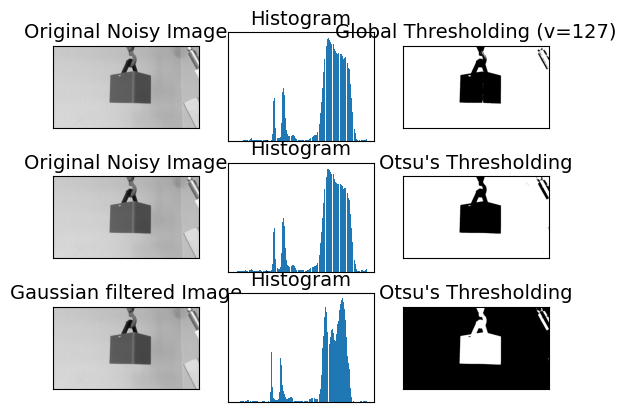

In [ ]:

# Opencv https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

img = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()